### Problem definition:

Discover look alike customers

In [61]:
# Load Packages and Data
# Exploratory Data Analysis (EDA)
    #-Descriptive Statistics
    #-Univariate Analysis
    #-Bivariate Analysis
    # Missing Value Treatment
# Kmeans Application
# Evaluate Algorithms: Baseline
# Evaluate Algorithms: Standardize data
# 

### Load Packages and Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
sns.set();

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load dataset
df_data = pd.read_csv('data/red_crown_sample_data1.csv',index_col=False)

In [66]:
# shape
df_data.shape

(239788, 13)

There are 23,9788 instances to work with and the data has 13 attributes.

In [67]:
# view sample rows
df_data.head()

,Unnamed: 0,ID,age,submission_date,contract_length,upgraded,gender,category,score1,score2,score3,first_contact,customer
0,1,qzx1,41,2013-03-30,2027.0,False,Female,1,4.155778,1.303375,-0.003228,NaN,False
1,2,qzx1,42,2016-06-30,162.0,False,Female,2,3.552356,1.719870,-0.000300,NaN,False
2,3,qzx1,40,2012-04-20,381.0,False,Female,2,3.551545,2.055290,-0.000003,NaN,False
3,4,qzx1,40,2013-11-02,351.0,False,Female,2,4.202698,1.151331,-0.010516,NaN,False
4,5,qzx1,44,2010-01-20,120.0,False,Female,2,2.818966,2.169682,-0.000348,NaN,False


In [68]:
# dataset attribute stat
df_data.describe()

,Unnamed: 0,age,contract_length,category,score1,score2,score3
count,239788.000000,239788.000000,68263.000000,239788.000000,239788.000000,239788.000000,239788.000000
mean,119894.500000,34.204689,2081.781185,1.621895,4.918111,1.118694,-1.516862
std,69220.977512,2.984439,1225.355978,0.484915,0.517630,0.599922,1.025697
min,1.000000,9.000000,1.000000,1.000000,2.149353,0.361095,-10.936312
25%,59947.750000,32.000000,1059.000000,1.000000,4.678020,0.711478,-2.027088
50%,119894.500000,34.000000,2036.000000,2.000000,5.033811,0.908702,-1.397082
75%,179841.250000,36.000000,3010.000000,2.000000,5.285969,1.347086,-0.787911
max,239788.000000,45.000000,6234.000000,2.000000,6.560284,5.713280,0.000000


In [69]:
# data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239788 entries, 0 to 239787
Data columns (total 13 columns):
Unnamed: 0         239788 non-null int64
ID                 239788 non-null object
age                239788 non-null int64
submission_date    239664 non-null object
contract_length    68263 non-null float64
upgraded           239788 non-null bool
gender             239788 non-null object
category           239788 non-null int64
score1             239788 non-null float64
score2             239788 non-null float64
score3             239788 non-null float64
first_contact      86501 non-null object
customer           239788 non-null bool
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 20.6+ MB


In [70]:
# Check for missing values
df_data.isnull().sum()

Unnamed: 0              0
ID                      0
age                     0
submission_date       124
contract_length    171525
upgraded                0
gender                  0
category                0
score1                  0
score2                  0
score3                  0
first_contact      153287
customer                0
dtype: int64

There are missing values in contract_length, submission_date and first_contact 

In [71]:
# customer class distribution
print(df_data.groupby('customer').size())

customer
False    211723
True      28065
dtype: int64


From the customer population size of 239,788 there are 28,065 customers and 211,723 customers that we want to extract lookalikes from.

In [72]:
df_data.ID.unique()

array(['qzx1', 'qzx2', 'qzx3', 'qzx4', 'qzx5', 'qzx6', 'qzx7', 'qzx8',
       'qzx9', 'qzx10', 'qzx11', 'qzx12', 'qzx13', 'qzx14', 'qzx15',
       'qzx16', 'qzx17', 'qzx18', 'qzx19', 'qzx20', 'qzx21', 'qzx22',
       'qzx23', 'qzx24', 'qzx25', 'qzx26', 'qzx27', 'qzx28', 'qzx29',
       'qzx30', 'qzx31', 'qzx32', 'qzx33', 'qzx34', 'qzx35', 'qzx36',
       'qzx37', 'qzx38', 'qzx39', 'qzx40', 'qzx41', 'qzx42', 'qzx43',
       'qzx44', 'qzx45', 'qzx46', 'qzx47', 'qzx48', 'qzx49', 'qzx50',
       'qzx51', 'qzx52', 'qzx53', 'qzx54', 'qzx55', 'qzx56', 'qzx57',
       'qzx58', 'qzx59', 'qzx60', 'qzx61', 'qzx62', 'qzx63', 'qzx64',
       'qzx65'], dtype=object)

The values of the 'ID' column seems to look like a categorization attribute, each value as a one to many mapping to a number of records.

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

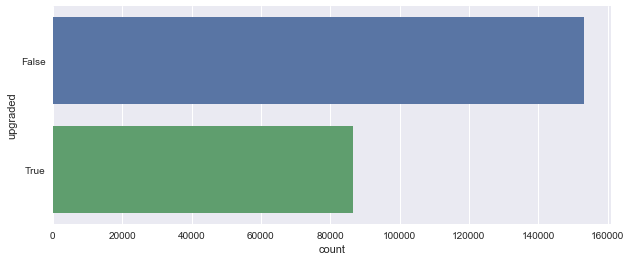

In [73]:
# The upgraded attribute
ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='upgraded', data=df_data);

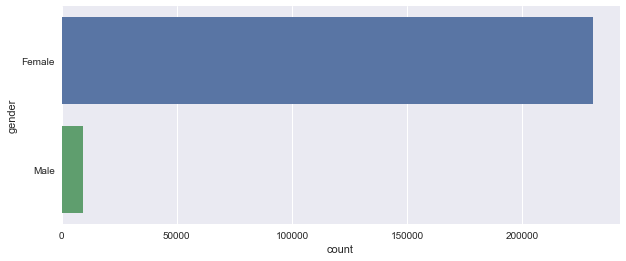

In [74]:
# Check categorical attribute gender
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y="gender", data=df_data)

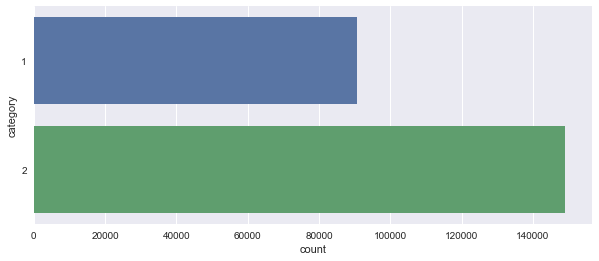

In [75]:
# The category attribute distribution
ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='category', data=df_data);

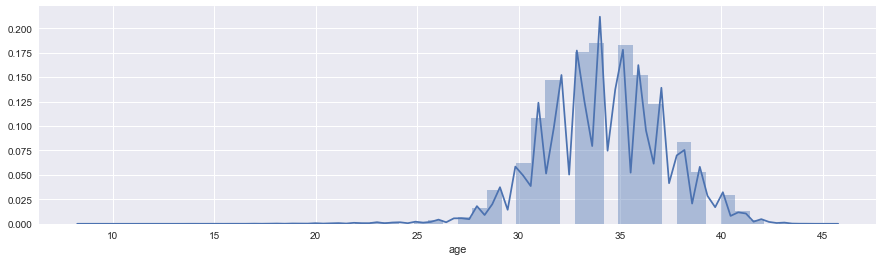

In [76]:
# The Age attribute
ax = plt.subplots(figsize=(15, 4))
sns.distplot(df_data.age, kde=True)

In [77]:
# remove NaN
df_data['contract_length'].fillna(0, inplace=True)

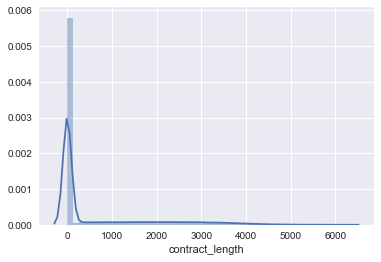

In [78]:
# The contract_length attribute
ax = plt.subplots()
sns.distplot(df_data.contract_length, kde=True)

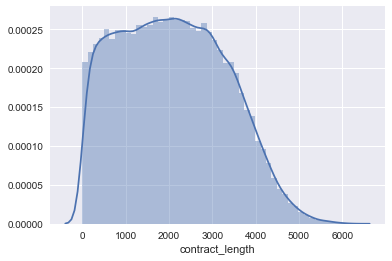

In [79]:
# The contract_length attribute: take out 0 to get a better view
ax = plt.subplots()
sns.distplot(df_data[df_data['contract_length']>0].contract_length, kde=True)

what is best approach to handle the NaN/0 value of contract_length?
is setting 0 ok?
will it be safe to use the strategy involving replacing NaN with the mode of the attribute?
It will be good to get details about the attribute from the buisness

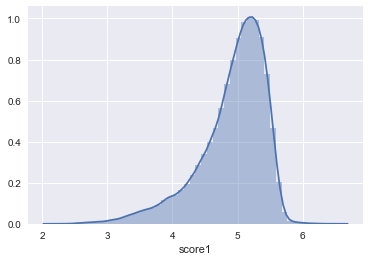

In [80]:
# The score1 attribute
ax = plt.subplots()
sns.distplot(df_data.score1, kde=True)

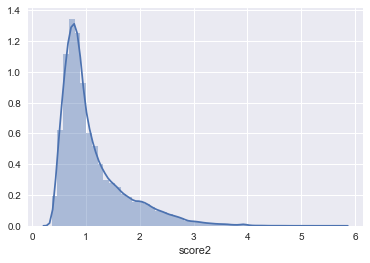

In [81]:
# The score2 attribute
ax = plt.subplots()
sns.distplot(df_data.score2, kde=True)

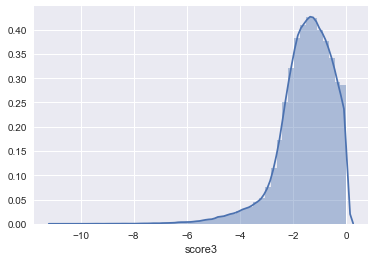

In [82]:
# The score3 attribute
ax = plt.subplots()
sns.distplot(df_data.score3, kde=True)

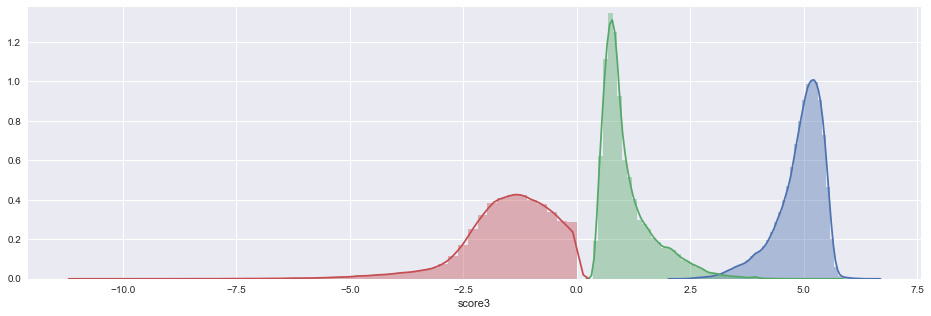

In [83]:
# The score1,score2,score3 attributes
ax = plt.subplots(figsize=(16, 5))
sns.distplot(df_data.score1, kde=True)
sns.distplot(df_data.score2, kde=True)
sns.distplot(df_data.score3, kde=True)

In [84]:
df_data.isna().sum()

Unnamed: 0              0
ID                      0
age                     0
submission_date       124
contract_length         0
upgraded                0
gender                  0
category                0
score1                  0
score2                  0
score3                  0
first_contact      153287
customer                0
dtype: int64

In [85]:
df_data.head()

,Unnamed: 0,ID,age,submission_date,contract_length,upgraded,gender,category,score1,score2,score3,first_contact,customer
0,1,qzx1,41,2013-03-30,2027.0,False,Female,1,4.155778,1.303375,-0.003228,NaN,False
1,2,qzx1,42,2016-06-30,162.0,False,Female,2,3.552356,1.719870,-0.000300,NaN,False
2,3,qzx1,40,2012-04-20,381.0,False,Female,2,3.551545,2.055290,-0.000003,NaN,False
3,4,qzx1,40,2013-11-02,351.0,False,Female,2,4.202698,1.151331,-0.010516,NaN,False
4,5,qzx1,44,2010-01-20,120.0,False,Female,2,2.818966,2.169682,-0.000348,NaN,False


Not sure what to do with the submission_date yet, there are no missing submission_date values in customer records and we 
only have them in non-customer records, the count of missing submission_date values is abt 124, this will be removed 
and be revisited subsequently. Same goes for first_contact date attribute to some extent. I dont want to throw away the rows of data involved.

In [86]:
df_data = df_data.drop(columns=['submission_date','first_contact'])
df_data.head()

,Unnamed: 0,ID,age,contract_length,upgraded,gender,category,score1,score2,score3,customer
0,1,qzx1,41,2027.0,False,Female,1,4.155778,1.303375,-0.003228,False
1,2,qzx1,42,162.0,False,Female,2,3.552356,1.719870,-0.000300,False
2,3,qzx1,40,381.0,False,Female,2,3.551545,2.055290,-0.000003,False
3,4,qzx1,40,351.0,False,Female,2,4.202698,1.151331,-0.010516,False
4,5,qzx1,44,120.0,False,Female,2,2.818966,2.169682,-0.000348,False


In [87]:
# fix missing values of contract_length
# replace missing values with the average contract_length:
df_data['contract_length'].fillna(df_data['contract_length'].mean(), inplace=True)
df_data.contract_length.isna().sum()

0

In [88]:
# convert bool attributes upgraded
df_data['upgraded'] = df_data.upgraded.apply(lambda x: str(x))
df_data['upgraded'] = df_data.upgraded.apply(lambda x: x.replace('False','0'))
df_data['upgraded'] = df_data.upgraded.apply(lambda x: x.replace('True','1'))
df_data.upgraded.unique()

array(['0', '1'], dtype=object)

In [89]:
# convert upgraded data fron object to number
df_data['upgraded'] = df_data.upgraded.apply(lambda x: int(x))

In [90]:
# convert categorical attributes gender
df_data['gender'] = df_data.gender.apply(lambda x: x.replace("Male","0"))
df_data['gender'] = df_data.gender.apply(lambda x: x.replace("Female","1"))
df_data.gender.unique()

array(['1', '0'], dtype=object)

In [91]:
# convert gender data fron object to number
df_data['gender'] = df_data.gender.apply(lambda x: int(x))

In [92]:
df_data.head()

,Unnamed: 0,ID,age,contract_length,upgraded,gender,category,score1,score2,score3,customer
0,1,qzx1,41,2027.0,0,1,1,4.155778,1.303375,-0.003228,False
1,2,qzx1,42,162.0,0,1,2,3.552356,1.719870,-0.000300,False
2,3,qzx1,40,381.0,0,1,2,3.551545,2.055290,-0.000003,False
3,4,qzx1,40,351.0,0,1,2,4.202698,1.151331,-0.010516,False
4,5,qzx1,44,120.0,0,1,2,2.818966,2.169682,-0.000348,False


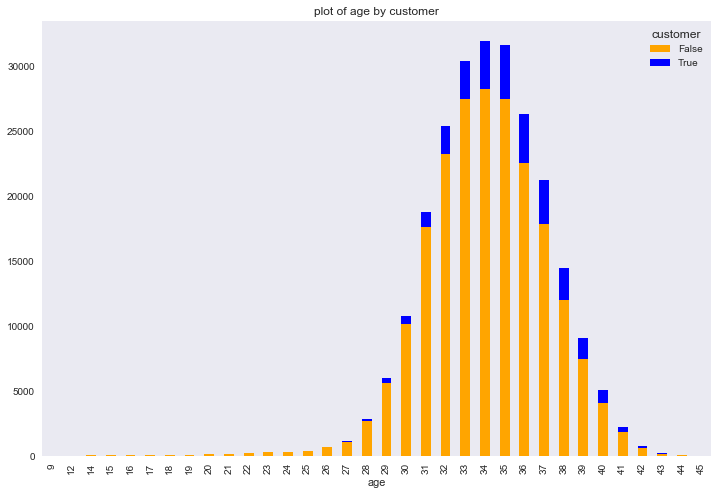

In [93]:
# Comparing the age and customer attributes
plot_data = pd.crosstab(df_data['age'],df_data['customer'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, figsize=(12,8), title='plot of age by customer')

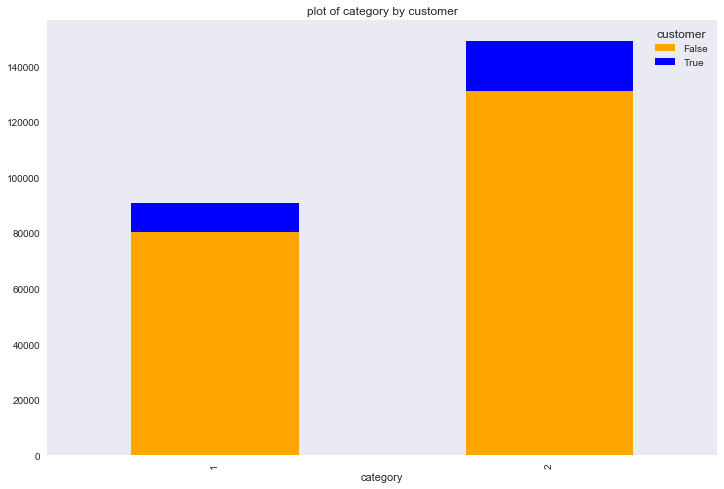

In [94]:
# Comparing the category and customer attributes
plot_data = pd.crosstab(df_data['category'],df_data['customer'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, figsize=(12,8), title='plot of category by customer')

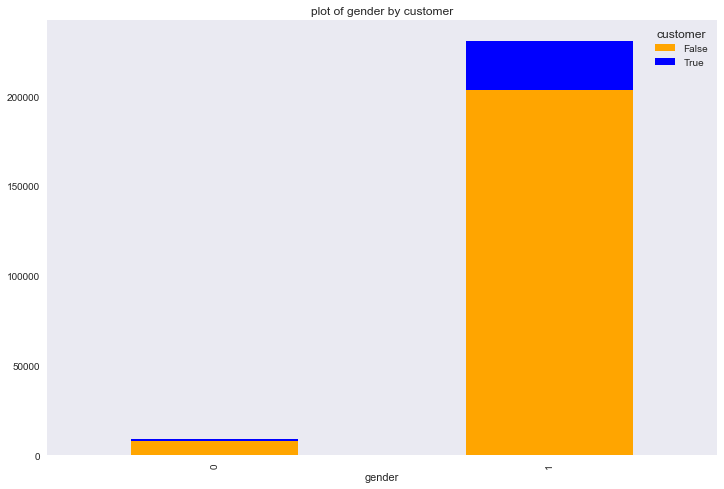

In [95]:
# Comparing the gender and customer attributes
plot_data = pd.crosstab(df_data['gender'],df_data['customer'])
plot_data.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False, figsize=(12,8), title='plot of gender by customer')

In [96]:
# convert bool attributes customer
df_data['customer'] = df_data.customer.apply(lambda x: str(x))
df_data['customer'] = df_data.customer.apply(lambda x: x.replace('False','0'))
df_data['customer'] = df_data.customer.apply(lambda x: x.replace('True','1'))
df_data.customer.unique()

array(['0', '1'], dtype=object)

In [97]:
# convert customer data fron object to number
df_data['customer'] = df_data.customer.apply(lambda x: int(x))

In [98]:
# select only numeric attributes
numeric_features = df_data[['age','contract_length','upgraded','gender','category','score1','score2','score3','customer']]


In [99]:
numeric_features.head()

,age,contract_length,upgraded,gender,category,score1,score2,score3,customer
0,41,2027.0,0,1,1,4.155778,1.303375,-0.003228,0
1,42,162.0,0,1,2,3.552356,1.719870,-0.000300,0
2,40,381.0,0,1,2,3.551545,2.055290,-0.000003,0
3,40,351.0,0,1,2,4.202698,1.151331,-0.010516,0
4,44,120.0,0,1,2,2.818966,2.169682,-0.000348,0


In [100]:
# attribute correlation
corr = numeric_features.corr()
print (corr['customer'].sort_values(ascending=False), '\n')

customer           1.000000
upgraded           0.266606
age                0.126768
score2             0.057003
category           0.012293
gender             0.007692
score3            -0.019022
contract_length   -0.088066
score1            -0.104302
Name: customer, dtype: float64 



### KMeans application

In [101]:
# create the dataset of known customers
df_customers = df_data[df_data['customer']==1]

In [102]:
df_customers = df_customers[df_customers['contract_length'] > 0]

In [103]:
# Apply the log normalization function to the columns
#df_customers["age_log"] = np.log(df_customers["age"])

In [104]:
# create the dataset of potential customers
df_non_customers = df_data[df_data['customer']==0]

In [105]:
# Store the identifier
df_non_customers_ID = df_non_customers['ID']
df_customers_ID = df_customers['ID']

In [106]:
# Drop the Id and customer values from the dataset
df_non_customers = df_non_customers.drop(['ID','customer','contract_length'],axis=1)
df_customers = df_customers.drop(['ID','customer','contract_length'],axis=1) 

In [107]:
# Convert dataframe into list and then into a numpy array
df_customers_values = df_customers.values.tolist() 
df_customers_values = np.array(df_customers_values)

In [108]:
## Convert non_customers dataframe into list and then into a numpy array
df_non_customers_values = df_non_customers.values.tolist() 
df_non_customers_values = np.array(df_non_customers_values)

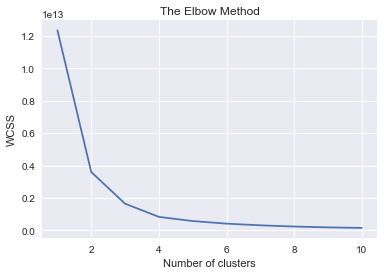

In [109]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_customers_values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
pred_labels = kmeans.fit_predict(df_customers_values)

In [111]:
# Add predicted labels to dataset
df_customers['pred_labels'] = pred_labels

### Use PCA on data and visualize

In [112]:
# 

### Evaluate Algorithms: Baseline
This is needed to know the algorithms that will do well in predicting look alike customers

In [113]:
# create train and validation datasets
X = df_customers[['age','upgraded','gender','category','score1','score2','score3']].values
y = df_customers[['pred_labels']].values

In [114]:
# validation options and evaluation metric
num_folds = 10
seed = 42
validation_size = 0.30
scoring = 'accuracy'

In [115]:
# train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [116]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVC' , SVC()))
models.append(( 'RF' , RandomForestClassifier()))

In [117]:
# Evaluate each model in turn and print accuracy
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.886505 (0.008883)
LDA: 0.886868 (0.015328)
KNN: 0.910142 (0.008121)
CART: 0.910855 (0.010863)
NB: 0.718587 (0.020886)
SVC: 0.940218 (0.014994)
RF: 0.924469 (0.017644)


The above results are mean accuracy values

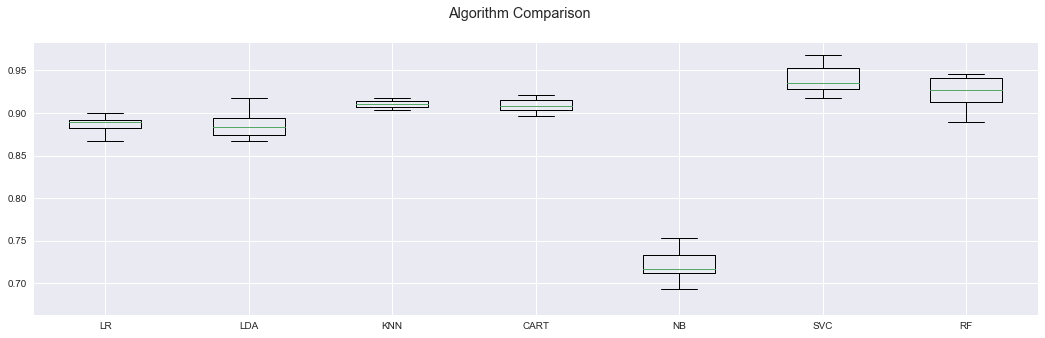

In [118]:
# Compare Algorithms
fig = plt.figure(figsize=(18,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Visualization of the distribution of algorithm performance, the SVC and RandomForestClassifier models appears to out perform the other models. More efforts could go into further improvement of both models. It should also be noted that the wide value range of attributes may in away affect perfomance. From my observations adjusting the value passed into the "random_state" directly affects model performance, I used 7 and 42.

### Evaluate Algorithms: Standardize Data

In [119]:
# Use StandardScaler

In [120]:
# Make predictions on validation dataset using the best model 
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.947368421053
[[174   0  21]
 [  0 566  19]
 [  2  21 394]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       195
           1       0.96      0.97      0.97       585
           2       0.91      0.94      0.93       417

   micro avg       0.95      0.95      0.95      1197
   macro avg       0.95      0.93      0.94      1197
weighted avg       0.95      0.95      0.95      1197



From the result above, the cluster labels 0,1,2 have precision values 0.99, 0.96, 0.91 respectively,
but when the value 7 was passed into "random_state" the model precision values for the cluster labels 0,1,2 were: 0.97, 0.97, 0.92 respectively.

In [122]:
# Get values to make predictions on new dataset
X = df_non_customers[['age','upgraded','gender','category','score1','score2','score3']].values
predictions_new = svc.predict(X)

In [123]:
# Add the predicted cluster label values to the dataset
df_non_customers['pred_cluster'] = predictions_new

In [124]:
# non_customers class distribution by pred_cluster
print(df_non_customers.groupby('pred_cluster').size())

pred_cluster
0    88963
1    57019
2    65741
dtype: int64


The result above shows the count of customers per label/cluster